# Brownian Motion Ensembles

Ensemble simulations of brownian motion, browninan motion with drift and geometric brownian motion are given.</br>
Let $B_t$ denote brownian motion and let $dB_t$ denote its inifinitesimal, with </br>

$
\begin{align}
&dB_t \sim N(0,dt) \\
&\text{E}[dB_t ] = 0 \\
&\text{E} [ ( dB_t )^2 ] = dt
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}(B_t) = 0 \\
&\text{Var}(B_t) = t
\end{align}
$

Brownian motion with drift is defined by the stochastic differential equation,</br>

$
\begin{align}
dD_t = \mu dt + \sigma dB_t
\end{align}
$

directly inegrating leads to the solution,</br>

$
\begin{align}
D_t = D_0 + \mu t + \sigma B_t
\end{align}
$

The first and second moments are,

$
\begin{align}
&\text{E}[D_t] = D_0 + \mu t\\
&\text{Var}[D_t] = \sigma^2 t
\end{align}
$

Geometric brownian motion is defined by stochastic differential equation, </br>

$
\begin{align}
dS_t = \mu S_t dt + \sigma S_t dB_t
\end{align}
$

Consider $\ln{S_t}$, applying Ito's lemma,</br>

$
\begin{align}
d(\ln{S_t}) = \frac{dS_t}{S_t} - \frac{1}{2}\frac{(dS_t)^2}{S_t^2}
\end{align}
$

From the stochastic differential equation $(dS_t)^2 = \sigma^2 dt$ so, 

$
\begin{align}
d(\ln{S_t}) = \left( \mu - \frac{1}{2}\sigma^2 \right) dt + \sigma dB_t
\end{align}
$

This equation can be integrated to give the solution,</br>

$
\begin{align}
S_t=S_0 e^{\left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma B_t}
\end{align}
$

The first and second moments of geometric brownian motion are,</br>

$
\begin{align}
&\text{E}[S_t] = S_0 e^{\mu t} \\
&\text{Var}[S_t] = S_0^2 e^{2\mu t}\left( e^{\sigma^2 t} - 1 \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import bm
from lib import plots
from lib import config
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 1024
time = numpy.linspace(0.0, float(npts)*Δt, npts)
nsim = 1000

def generate_ensemble(nsim, npts):
    samples = numpy.array([bm.generate(npts, Δt)])
    for i in range(1, nsim):
        samples = numpy.append(samples, numpy.array([bm.generate(npts, Δt)]), axis=0)
    return samples

def generate_with_drift_ensemble(nsim, npts, μ, σ):
    samples = numpy.array([bm.generate_with_drift(μ, σ, npts, Δt)])
    for i in range(1, nsim):
        samples = numpy.append(samples, numpy.array([bm.generate_with_drift(μ, σ, npts, Δt)]), axis=0)
    return samples

def generate_geometric_ensemble(nsim, npts, μ, σ, s0):
    samples = numpy.array([bm.generate_geometric(μ, σ, s0, npts, Δt)])
    for i in range(1, nsim):
        samples = numpy.append(samples, numpy.array([bm.generate_geometric(μ, σ, s0, npts, Δt)]), axis=0)
    return samples

## Plots

In [3]:
def ensemble_plot(samples, time, title):
    nplot = len(samples)
    figure, axis = pyplot.subplots(figsize=(15, 12))
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$B_t$")
    axis.set_title(title)
    for i in range(nplot):
        axis.plot(time, samples[i], lw=1)

def ensemble_mean_plot(mean, time, μ, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    step = int(len(time) / 10)
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$μ_t$")
    axis.set_title(title)
    axis.plot(time, mean, label="Ensemble Average")
    axis.plot(time[::step], numpy.full(len(time[::step]), μ), label=r"$\mu$", marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)

def ensemble_mean_plot_with_drift(mean, time, μ, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    step = int(len(time) / 10)
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$μ_t$")
    axis.set_title(title)
    axis.plot(time, mean, label="Ensemble Average")
    axis.plot(time[::step], μ*time[::step], label=r"$\mu t$", marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)

def ensemble_std_plot(std, time, σ, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    step = int(len(time) / 10)
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$σ_t$")
    axis.set_title(title)
    axis.plot(time, std, label="Ensemble Average")
    label=r"$\sigma \sqrt{t}$"
    if σ == 1.0:
        label = label=r"$\sqrt{t}$"
    axis.plot(time[::step], σ*numpy.sqrt(time[::step]), label=label, marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)
    
def ensemble_mean_plot_gbm(mean, time, S0, μ, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    step = int(len(time) / 10)
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$μ_t$")
    axis.set_title(title)
    axis.plot(time, mean, label="Ensemble Average")
    axis.plot(time[::step], S0*numpy.exp(μ*time[::step]), label=r"$S_0 e^{\mu t}$", marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)
    
def ensemble_std_plot_gbm(std, time, S0, μ, σ, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    step = int(len(time) / 10)
    step = int(len(time) / 10)
    var = S0**2*numpy.exp(2*μ*time[::step])*(numpy.exp(time[::step]*σ**2) -1)
    std_label = r"$S_0 e^{\mu t}\sqrt{e^{\sigma^2 t} - 1}$"
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$σ_t$")
    axis.set_title(title)
    axis.plot(time, std, label="Ensemble Average")
    axis.plot(time[::step], numpy.sqrt(var), label=std_label, marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)

## Brownian Motion

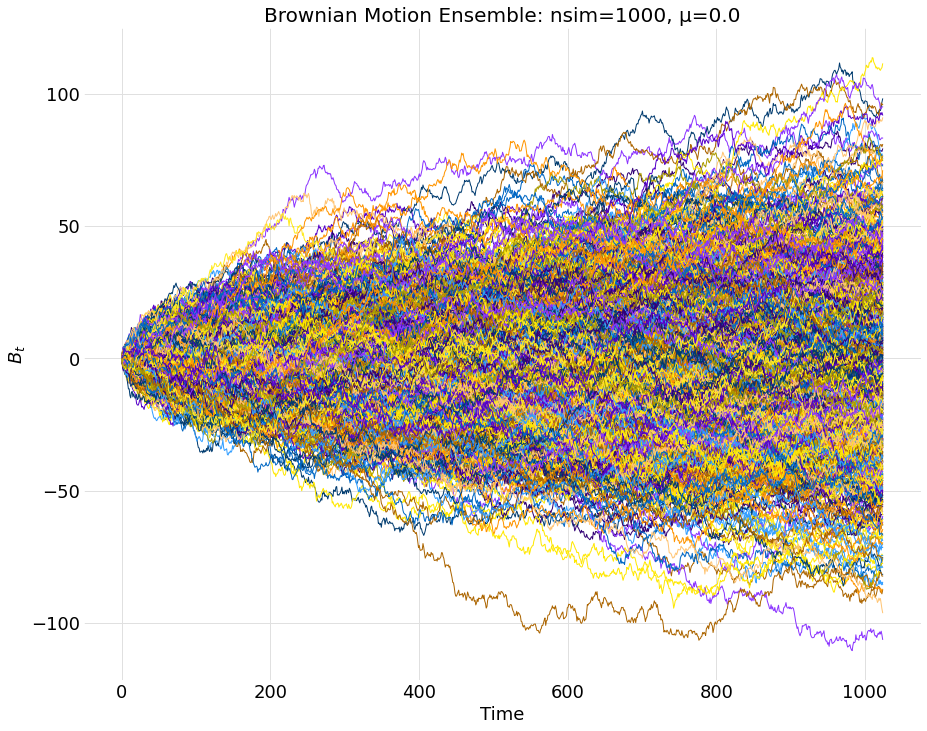

In [4]:
title = f"Brownian Motion Ensemble: nsim={nsim}, μ=0.0"
samples = generate_ensemble(nsim, npts)
ensemble_plot(samples, time, title)

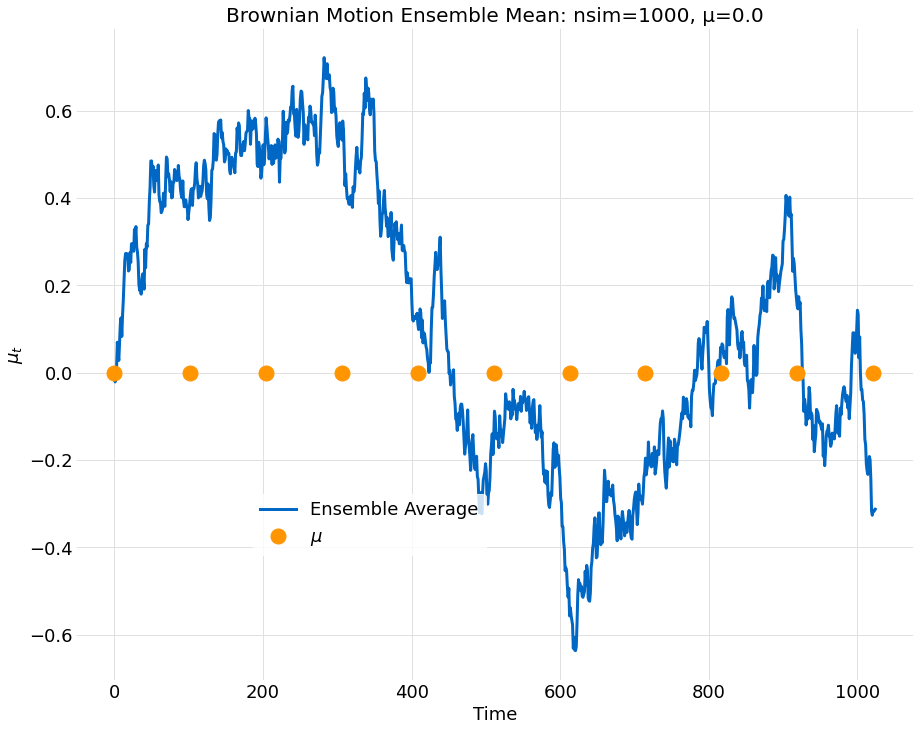

In [5]:
mean = stats.ensemble_mean(samples)
title = f"Brownian Motion Ensemble Mean: nsim={nsim}, μ=0.0"
ensemble_mean_plot(mean, time, 0.0, (0.5, 0.3), title)

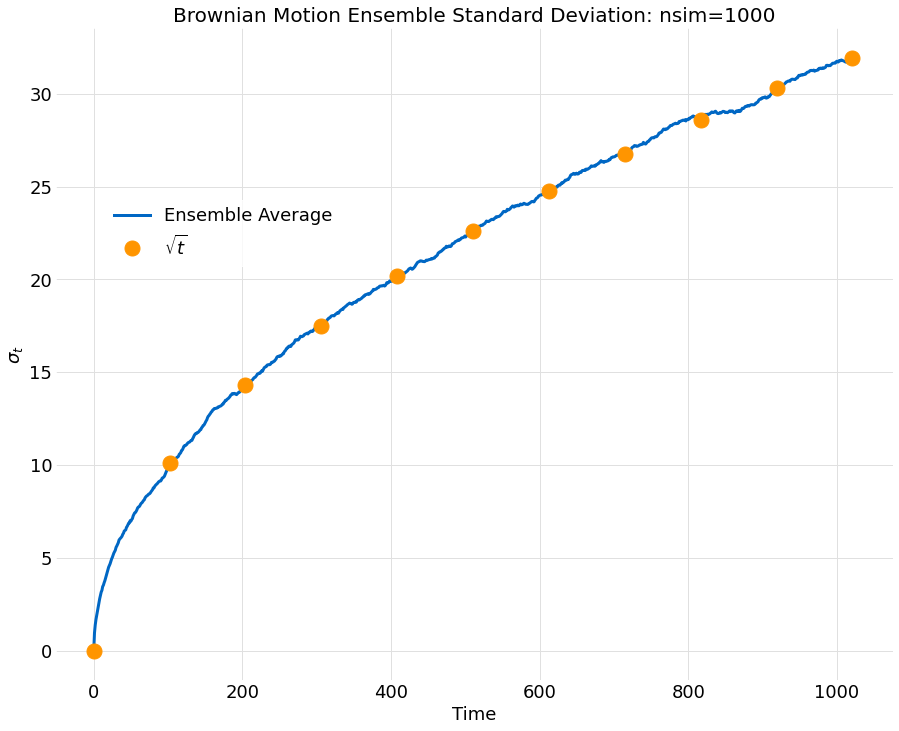

In [6]:
title = f"Brownian Motion Ensemble Standard Deviation: nsim={nsim}"
std = stats.ensemble_std(samples)
ensemble_std_plot(std, time, 1.0, (0.35, 0.75), title)

## Brownian Motion with Drift

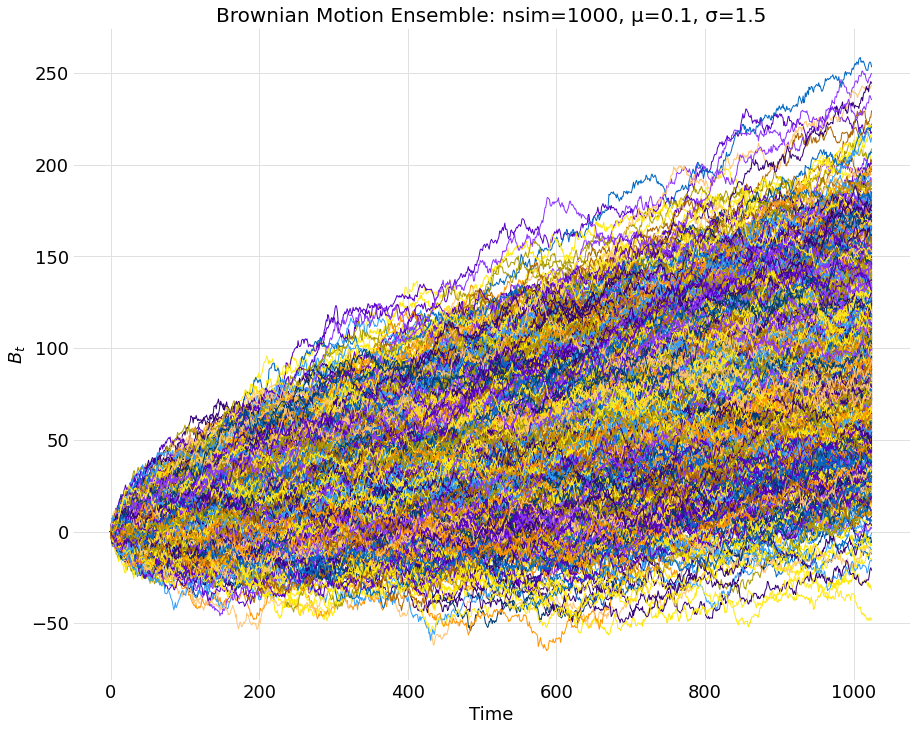

In [7]:
μ=0.1
σ=1.5
title = f"Brownian Motion Ensemble: nsim={nsim}, μ={μ}, σ={σ}"
samples = generate_with_drift_ensemble(nsim, npts, μ, σ)
ensemble_plot(samples, time, title)

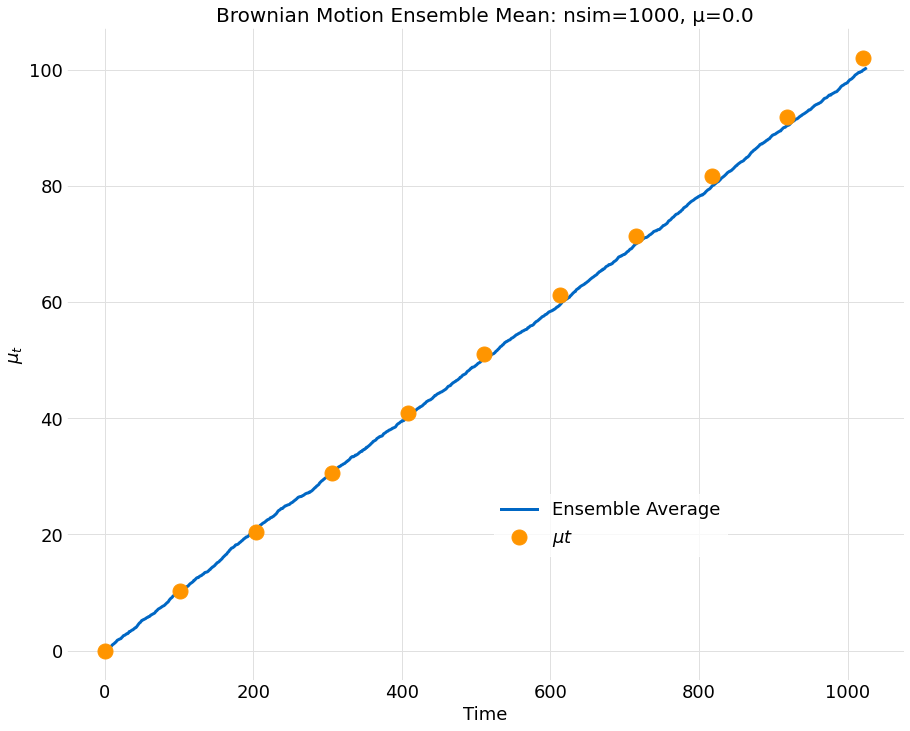

In [8]:
mean = stats.ensemble_mean(samples)
title = f"Brownian Motion Ensemble Mean: nsim={nsim}, μ=0.0"
ensemble_mean_plot_with_drift(mean, time, μ, (0.5, 0.3), title)

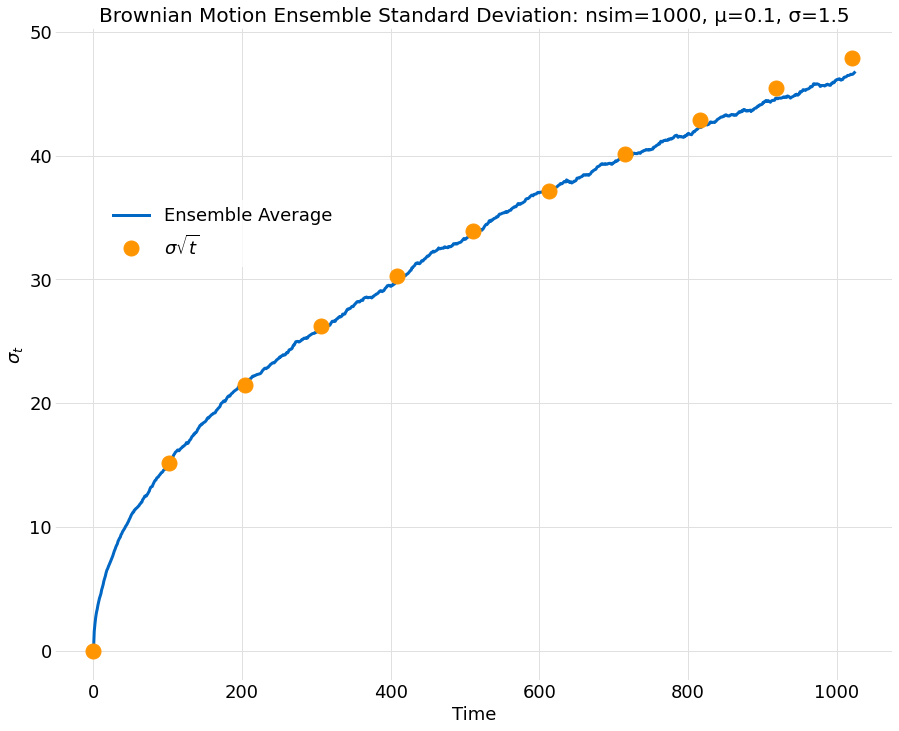

In [9]:
title = f"Brownian Motion Ensemble Standard Deviation: nsim={nsim}, μ={μ}, σ={σ}"
std = stats.ensemble_std(samples)
ensemble_std_plot(std, time, σ, (0.35, 0.75), title)

## Geometric Brownian Motion

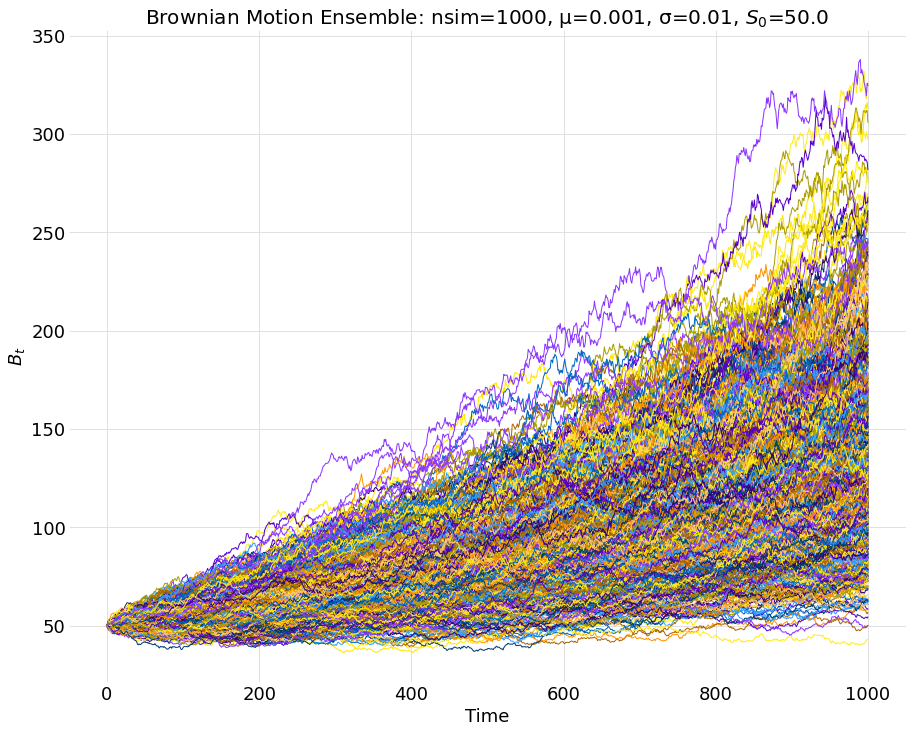

In [10]:
npts = 1000
nsim = 1000
time = numpy.linspace(0.0, float(npts)*Δt, npts)
μ=0.001
σ=0.01
S0 = 50.0
title = r'Brownian Motion Ensemble: nsim={nsim}, μ={μ}, σ={σ}, $S_0$={S0}'.format(nsim=nsim, μ=μ, σ=σ, S0=S0)
samples = generate_geometric_ensemble(nsim, npts, μ, σ, S0)
ensemble_plot(samples, time, title)

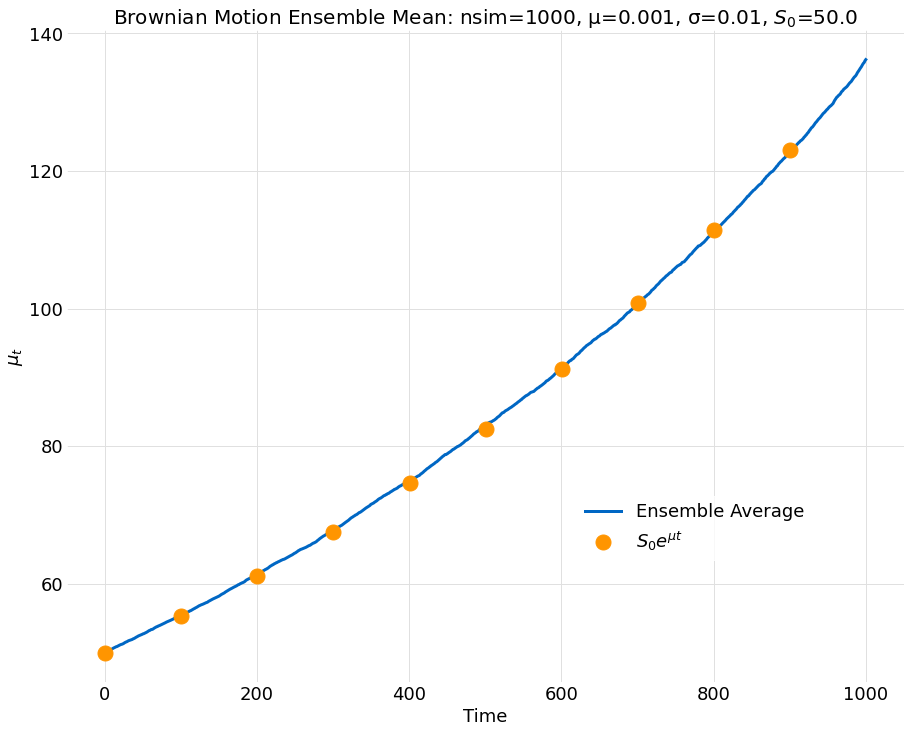

In [11]:
mean = stats.ensemble_mean(samples)
title = r'Brownian Motion Ensemble Mean: nsim={nsim}, μ={μ}, σ={σ}, $S_0$={S0}'.format(nsim=nsim, μ=μ, σ=σ, S0=S0)
ensemble_mean_plot_gbm(mean, time, S0, μ, (0.6, 0.3), title)

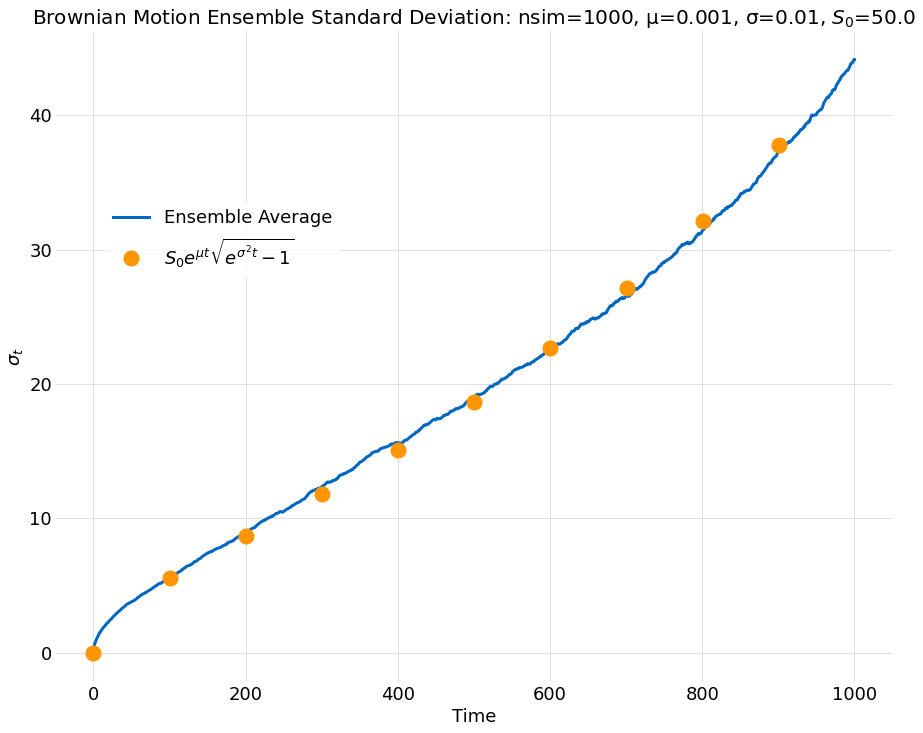

In [12]:
title = r'Brownian Motion Ensemble Standard Deviation: nsim={nsim}, μ={μ}, σ={σ}, $S_0$={S0}'.format(nsim=nsim, μ=μ, σ=σ, S0=S0)
std = stats.ensemble_std(samples)
ensemble_std_plot_gbm(std, time, S0, μ, σ, (0.35, 0.75), title)